# 5 Advanced Modelling - Deep Learning 

In this notebook we will employ deep learning packages models on our two wells to see if we can further improve the MAPE scores compared to our base models(classical timeseries forecasting) and specialized packages. We will be using the Tensorflow network. TensorFLow package using the Keras wrapper. TensorFlow is the most popular deep learning framework available in python. We will develop 3 different architectures for time series forecasting using Tensorflow.

## TABLE OF CONTENTS:
* [5.1 Import Relevant Package](#1)
* [5.2 Import CSV](#2)
* [5.3 Examine Data](#3)
* [5.4 Preprocessing and training for well with a typical decline curve profile](#4)
    * [5.4.1 TensorFlow/Keras - Deep Neural Network](#5)
    * [5.4.2 TensorFlow/Keras - LSTM](#6)
    * [5.4.3 TensorFlow/Keras - CNN](#7)
    * [5.4.4 Performance of Models](#8)
* [5.5 Preprocessing and training for well that does not have typical decline curve profile](#9)
    * [5.5.1 TensorFlow/Keras - Deep Neural Network](#10)
    * [5.5.2 TensorFlow/Keras - LSTM](#11)
    * [5.5.3 TensorFlow/Keras - CNN](#12)
    * [5.5.4 Performance of Models](#13)
* [5.6 Summary](#14)

 <b>5.1 Import Relevant Package <b/> <a class="anchor" id="1"></a>

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from array import array
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import itertools
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure

 <b>5.2 Import CSV <b/> <a class="anchor" id="2"></a>

In [2]:
df = pd.read_csv('Monthly.csv')
PerformanceB1 = pd.read_csv('df1Performance.csv')
PerformanceB2 = pd.read_csv('df2Performance.csv')
PerformanceA1 = pd.read_csv('df1AdvancedPerformance.csv')
PerformanceA2 = pd.read_csv('df2AdvancedPerformance.csv')

 <b>5.3 Examine Data <b/>  <a class="anchor" id="3"></a>

Drop index and level_0 columns

In [3]:
df.drop(columns=['index','level_0'], inplace=True)

Call head of data

In [4]:
df.head(2)

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,...,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,...,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
1,2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,...,155.976129,0.0,46.416057,67.994387,55.577839,39.485194,20569.0,0.0,783.0,0.0


Make 'DATEPRD' as index

In [5]:
df.set_index('DATEPRD',inplace=True)

Call head of data.

In [6]:
df.head(2)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,...,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,...,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,...,155.976129,0.0,46.416057,67.994387,55.577839,39.485194,20569.0,0.0,783.0,0.0


Convert index to datetime

In [7]:
df.index = pd.to_datetime(df.index)

Call shape of dataframe

In [8]:
df.shape

(285, 25)

Call column names

In [9]:
df.columns

Index(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'NPD_WELL_BORE_NAME', 'AVG_DOWNHOLE_PRESSURE.shifted3',
       'AVG_DOWNHOLE_TEMPERATURE.shifted3', 'AVG_DP_TUBING.shifted3',
       'AVG_ANNULUS_PRESS.shifted3', 'AVG_CHOKE_SIZE_P.shifted3',
       'AVG_WHP_P.shifted3', 'AVG_WHT_P.shifted3', 'DP_CHOKE_SIZE.shifted3',
       'BORE_OIL_VOL.shifted3', 'BORE_GAS_VOL.shifted3',
       'BORE_WAT_VOL.shifted3', 'BORE_WI_VOL.shifted3'],
      dtype='object')

In [10]:
list_to_remove = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'AVG_DOWNHOLE_PRESSURE.shifted3',
       'AVG_DOWNHOLE_TEMPERATURE.shifted3', 'AVG_DP_TUBING.shifted3',
       'AVG_ANNULUS_PRESS.shifted3', 'AVG_CHOKE_SIZE_P.shifted3',
       'AVG_WHP_P.shifted3', 'AVG_WHT_P.shifted3', 'DP_CHOKE_SIZE.shifted3',
       'BORE_OIL_VOL.shifted3', 'BORE_GAS_VOL.shifted3',
       'BORE_WAT_VOL.shifted3', 'BORE_WI_VOL.shifted3']

Drop all unwanted columns.

In [11]:
df.drop(columns=list_to_remove,inplace=True)

Call head of dataframe.

In [12]:
df.head(2)

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2014-07-01,15084.0,15/9-F-1 C
2014-08-01,6968.0,15/9-F-1 C


Call tail of dataframe

In [13]:
df.tail()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2016-03-01,3746.0,15/9-F-15 D
2016-04-01,4545.0,15/9-F-15 D
2016-05-01,4696.0,15/9-F-15 D
2016-06-01,3466.0,15/9-F-15 D
2016-07-01,828.0,15/9-F-15 D


 <b>5.4 Preprocessing and training for well with a typical decline curve profile<b/> <a class="anchor" id="4"></a>

Create dataframe df1 for F-14 well.

In [14]:
df1 = df[df['NPD_WELL_BORE_NAME'] =='15/9-F-14'].copy()

Plot oil production rate

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

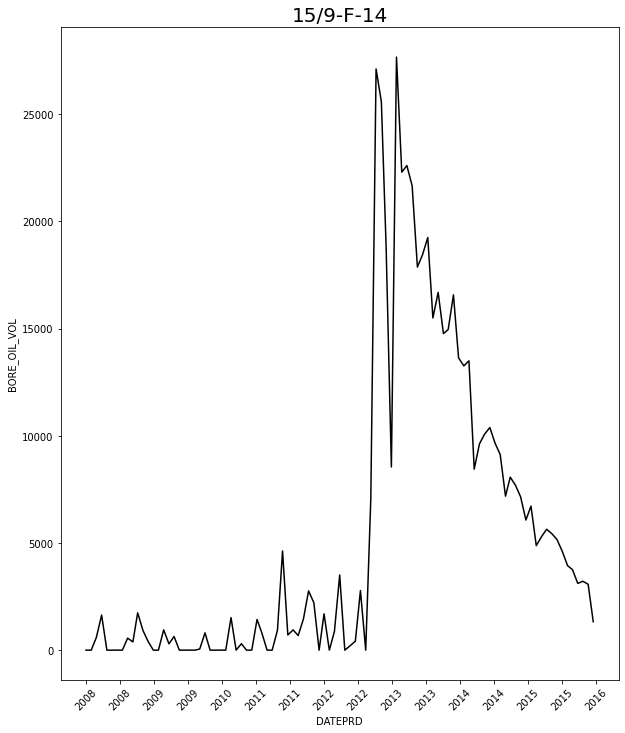

In [15]:
%matplotlib inline
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
plt.xticks(rotation = 45)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')

Remove irrelevant data

In [16]:
df1= df1[df1.index >= '2013-02-01'].copy()

Plot oil production rate

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

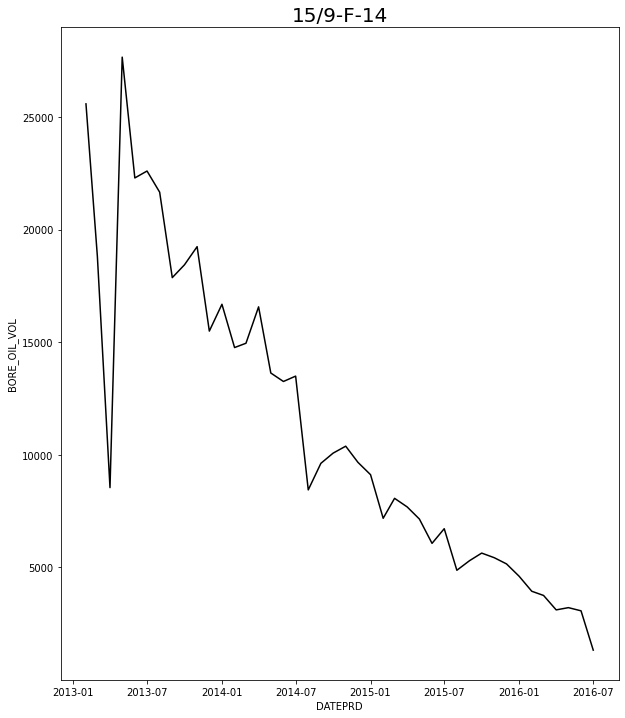

In [17]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')

Examine dataframe shape.

In [18]:
df1.shape

(42, 2)

Call dataframe head.

In [19]:
df1.head()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2013-02-01,25589.0,15/9-F-14
2013-03-01,18818.0,15/9-F-14
2013-04-01,8545.0,15/9-F-14
2013-05-01,27665.0,15/9-F-14
2013-06-01,22299.0,15/9-F-14


Call dataframe tail

In [20]:
df1.tail()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2016-03-01,3755.0,15/9-F-14
2016-04-01,3114.0,15/9-F-14
2016-05-01,3214.0,15/9-F-14
2016-06-01,3073.0,15/9-F-14
2016-07-01,1326.0,15/9-F-14


In [21]:
df1 = df1.drop(columns=['NPD_WELL_BORE_NAME'])

In [22]:
df1

,BORE_OIL_VOL
DATEPRD,
2013-02-01,25589.0
2013-03-01,18818.0
2013-04-01,8545.0
2013-05-01,27665.0
2013-06-01,22299.0
2013-07-01,22606.0
2013-08-01,21667.0
2013-09-01,17872.0
2013-10-01,18442.0


In [23]:
df1.shape

(42, 1)

 <b>5.4.1 TensorFlow/Keras - Deep Neural Network<b/> <a class="anchor" id="5"></a>

The first Deeplearning model is a fully connected Multi-level perceptron model with 3 hidden layers. 

Define conver2matrix function. This function will take our data and prepare it for processing. 

In [24]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d,0])
  Y.append(data_arr[d,0])
 return np.array(X), np.array(Y)

Split data set into testing dataset and train dataset

In [25]:
train_size = 38
train, test =df1.values[0:train_size-3,:],df1.values[train_size-3:len(df1.values),:]

Define Look_back window

In [26]:
look_back = 3

Convert datast into right shape using conver2matrix function

In [27]:
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

Call trainX shape

In [28]:
trainX.shape

(32, 3)

Call testX shape

In [29]:
testX.shape

(4, 3)

Check trainY

In [30]:
trainY

array([27665., 22299., 22606., 21667., 17872., 18442., 19248., 15497.,
       16688., 14766., 14957., 16574., 13635., 13259., 13497.,  8444.,
        9623., 10076., 10385.,  9668.,  9119.,  7183.,  8069.,  7687.,
        7149.,  6069.,  6720.,  4874.,  5298.,  5637.,  5431.,  5156.])

Check testX

In [31]:
testX

array([[4607., 3942., 3755.],
       [3942., 3755., 3114.],
       [3755., 3114., 3214.],
       [3114., 3214., 3073.]])

Check testY

In [32]:
testY

array([3114., 3214., 3073., 1326.])

Build model using keras

In [33]:
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(units=6, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

Fit data to model

In [34]:
model=model_dnn(look_back)

In [35]:
history=model.fit(trainX,trainY, epochs=1000, batch_size=30, verbose=0, validation_data=(testX,testY),shuffle=False)

Predict last 4 months of production

In [36]:
test_predict = model.predict(testX)

Call Predictions

In [37]:
test_predict

array([[3747.4915],
       [3152.0615],
       [3107.9219],
       [2797.9475]], dtype=float32)

Create oil production rate time series

In [38]:
df1_Oil = df1['BORE_OIL_VOL']

Create Testing time series

In [39]:
Test=df1_Oil.loc['2016-04-01':]

Create Summary dataframe

In [40]:
Summary =pd.DataFrame(Test)

In [41]:
Summary

,BORE_OIL_VOL
DATEPRD,
2016-04-01,3114.0
2016-05-01,3214.0
2016-06-01,3073.0
2016-07-01,1326.0


In [42]:
Summary['DNN'] =pd.DataFrame(model.predict(testX),index=Test.index)

In [43]:
Summary

,BORE_OIL_VOL,DNN
DATEPRD,,
2016-04-01,3114.0,3747.491455
2016-05-01,3214.0,3152.061523
2016-06-01,3073.0,3107.921875
2016-07-01,1326.0,2797.947510


 <b>5.4.2 TensorFlow/Keras - LSTM<b/> <a class="anchor" id="6"></a>

Long short-term memory or LSTM is an artificial recurrent neural network (RNN) architecture that unlike standard feedforward neural networks has feedback connection/s. LSTMS are well-suited to classifying, processing, and making predictions based on time series data. 

Create prepare_data function for preparing independent and dependent features


In [44]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Create training data

In [45]:
df1train = df1[:-4]

Define input sequence

In [46]:
timeseries_data = list(df1train['BORE_OIL_VOL'])

Choose a number of time steps

In [47]:
n_steps = 3

Split into samples

In [48]:
X, y = prepare_data(timeseries_data, n_steps)

Reshape from [samples, timesteps] into [samples, timesteps, features]

In [49]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Call shape of input array

In [50]:
X.shape

(35, 3, 1)

Define LSTM model with 2 hidden layers

In [51]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Fit model

In [52]:
model.fit(X, y, epochs=3000, verbose=0)

Predict last 4 months

In [53]:
x_input =np.array([4607,3942,3755])
temp_input=list(x_input)
lst_output = []
i=0
while(i<4):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3900.65]
1 day input [3942.         3755.         3900.64990234]
1 day output [[3541.916]]
2 day input [3755.         3900.64990234 3541.91601562]
2 day output [[3329.5298]]
3 day input [3900.65   3541.916  3329.5298]
3 day output [[3300.7466]]
[3900.65, 3541.916, 3329.5298, 3300.7466]


In [54]:
Summary['LSTM'] =pd.DataFrame(lst_output,index=Test.index)

In [55]:
Summary

,BORE_OIL_VOL,DNN,LSTM
DATEPRD,,,
2016-04-01,3114.0,3747.491455,3900.649902
2016-05-01,3214.0,3152.061523,3541.916016
2016-06-01,3073.0,3107.921875,3329.529785
2016-07-01,1326.0,2797.947510,3300.746582


 <b>5.4.3 TensorFlow/Keras - CNN<b/> <a class="anchor" id="7"></a>

CNNs or Convolutional Neural Network models are is a class of artificial neural network ANN, most commonly applied to analyze visual imagery. CNNs are also known as Shift invariant or space Invariant Artificial Neural Networks (SIANN) based on the shared-weight architecture of the convolution kernels or filters that slide along inout features and provide translation-equivalent responses known as feature maps (Source: Wikipedia).

In [56]:
y.shape

(35,)

In [57]:
type(X)

numpy.ndarray

In [58]:
type(y)

numpy.ndarray

Define model


In [59]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Fit model

In [60]:
model.fit(X, y, epochs=3000, verbose=0)

Predict last 4 months

In [61]:
initial_input = [4607,3942,3755]
predictions = []
for num in range(4):
    x_input = array(initial_input[-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    list1 = list(itertools.chain(*yhat))
    initial_input = initial_input+ list1
    predictions = predictions + list1

Call Predictions

In [62]:
print(predictions)

[3611.7078, 3152.0457, 2989.9067, 2842.4878]


In [63]:
Summary['CNN'] =pd.DataFrame(predictions,index=Test.index)

In [64]:
Summary

,BORE_OIL_VOL,DNN,LSTM,CNN
DATEPRD,,,,
2016-04-01,3114.0,3747.491455,3900.649902,3611.707764
2016-05-01,3214.0,3152.061523,3541.916016,3152.045654
2016-06-01,3073.0,3107.921875,3329.529785,2989.906738
2016-07-01,1326.0,2797.947510,3300.746582,2842.487793


Transpose Summary dataframe

In [65]:
Summary.transpose()

DATEPRD,2016-04-01,2016-05-01,2016-06-01,2016-07-01
BORE_OIL_VOL,3114.000000,3214.000000,3073.000000,1326.000000
DNN,3747.491455,3152.061523,3107.921875,2797.947510
LSTM,3900.649902,3541.916016,3329.529785,3300.746582
CNN,3611.707764,3152.045654,2989.906738,2842.487793


Create new dataframe Summaryt which is the transposed version of Summary dataframe.

In [66]:
Summaryt=Summary.transpose()

Remove first row of Summaryt

In [67]:
Summaryt = Summaryt.iloc[1:]

Examine Summaryt dataframe.

In [68]:
Summaryt

DATEPRD,2016-04-01,2016-05-01,2016-06-01,2016-07-01
DNN,3747.491455,3152.061523,3107.921875,2797.947510
LSTM,3900.649902,3541.916016,3329.529785,3300.746582
CNN,3611.707764,3152.045654,2989.906738,2842.487793


Create a list of the dates out of Summary.index

In [69]:
Columns = list(Summary.index)

Add "MAPE" column to Columns list.

In [70]:
Columns.append('MAPE')

Create performance dataframe using the Columns list as the columns.

In [71]:
PerformanceD1 = pd.DataFrame(columns=Columns)

Call Performance dataframe

In [72]:
PerformanceD1

,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE


Create list out of Summary.Columns

In [73]:
Summary_Columns = list(Summary.columns)

Remove 'BORE_OIL_VOL' from list

In [74]:
Summary_Columns.remove('BORE_OIL_VOL')

Call Summary_Columns list

In [75]:
Summary_Columns

['DNN', 'LSTM', 'CNN']

Create list out of Model names

In [76]:
Indexes = ['DNN', 'LSTM', 'CNN']

Define MAPE function

In [77]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

Append Performance dataframe with APE and MAPE for each model.

In [78]:
index=0
for element in range(3):
    PerformanceD1.loc[Indexes[index]] = [mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-05-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       (mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-05-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]))/4
                                      ]
    index =index + 1

 <b>5.4.4 Performance of Models<b/> <a class="anchor" id="8"></a>

Call Performance dataframe

In [79]:
PerformanceD1

,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
DNN,1.222271,1.927146,2.572780,137.712030,35.858557
LSTM,13.741683,10.202739,15.259226,167.112822,51.579117
CNN,1.221762,1.927640,2.572263,137.710834,35.858125


Save Performance dataframe as CSV

In [80]:
PerformanceD1.to_csv('df1DeeplearningPerformance.csv')

 <b>5.5 Preprocessing and training for well that does not have typical decline curve profile <b/> <a class="anchor" id="19"></a><b/> <a class="anchor" id="9"></a>

From the previous notebook we can see that well F-15 does not follow a typical decline curve thus we will use this as the second well for modelling.

In [81]:
df2 = df[df['NPD_WELL_BORE_NAME'] =='15/9-F-15 D'].copy()

Plot oil production rate

<AxesSubplot:title={'center':'15/9-F-15'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

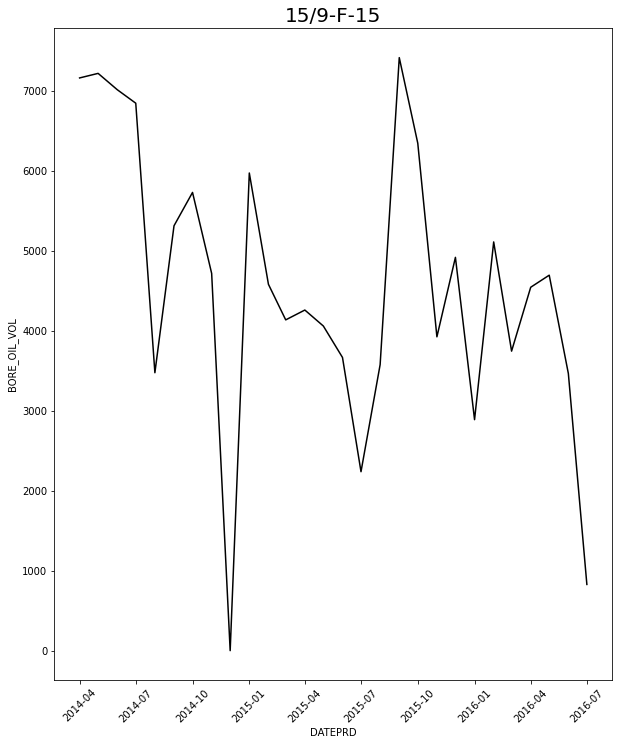

In [82]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-15',size=20)
plt.xticks(rotation = 45)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df2, ax=ax, color='black')

Examine dataframe shape.

In [83]:
df2.shape

(28, 2)

Call dataframe head.

In [84]:
df2.head()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2014-04-01,7163.0,15/9-F-15 D
2014-05-01,7220.0,15/9-F-15 D
2014-06-01,7016.0,15/9-F-15 D
2014-07-01,6847.0,15/9-F-15 D
2014-08-01,3476.0,15/9-F-15 D


Call dataframe tail

In [85]:
df2.tail()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2016-03-01,3746.0,15/9-F-15 D
2016-04-01,4545.0,15/9-F-15 D
2016-05-01,4696.0,15/9-F-15 D
2016-06-01,3466.0,15/9-F-15 D
2016-07-01,828.0,15/9-F-15 D


Drop well name column

In [86]:
df2 = df2.drop(columns=['NPD_WELL_BORE_NAME'])

Call df2

In [87]:
df2

,BORE_OIL_VOL
DATEPRD,
2014-04-01,7163.0
2014-05-01,7220.0
2014-06-01,7016.0
2014-07-01,6847.0
2014-08-01,3476.0
2014-09-01,5314.0
2014-10-01,5731.0
2014-11-01,4718.0
2014-12-01,0.0


Call dataframe shape

In [88]:
df2.shape

(28, 1)

 <b>5.5.1 TensorFlow/Keras - Deep Neural Network<b/> <a class="anchor" id="10"></a>

The first Deeplearning model is a fully connected Multi-level perceptron model with 3 hidden layers.

Define conver2matrix function. This function will take our data and prepare it for processing

In [89]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d,0])
  Y.append(data_arr[d,0])
 return np.array(X), np.array(Y)

Split data set into testing dataset and train dataset

In [90]:
train_size = 24
train, test =df2.values[0:train_size-3,:],df2.values[train_size-3:len(df2.values),:]

Define Look_back window

In [91]:
look_back = 3

Convert datast into right shape using conver2matrix function

In [92]:
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

Call trainX shape

In [93]:
trainX.shape

(18, 3)

Call testX shape

In [94]:
testX.shape

(4, 3)

Check trainY

In [95]:
trainY

array([6847., 3476., 5314., 5731., 4718.,    0., 5974., 4582., 4137.,
       4260., 4060., 3667., 2238., 3577., 7417., 6346., 3925., 4919.])

Check testX

In [96]:
testX

array([[2889., 5112., 3746.],
       [5112., 3746., 4545.],
       [3746., 4545., 4696.],
       [4545., 4696., 3466.]])

Check testY

In [97]:
testY

array([4545., 4696., 3466.,  828.])

Build model using keras

In [98]:
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(units=6, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

Fit data to model

In [99]:
model=model_dnn(look_back)

In [100]:
history=model.fit(trainX,trainY, epochs=1000, batch_size=30, verbose=0, validation_data=(testX,testY),shuffle=False)

Predict last 4 months of production

In [101]:
test_predict = model.predict(testX)

Call Predictions

In [102]:
test_predict

array([[1678.8265],
       [4517.665 ],
       [4122.651 ],
       [2520.7708]], dtype=float32)

Create oil production rate time series

In [103]:
df2_Oil = df2['BORE_OIL_VOL']

Create Testing time series

In [104]:
Test=df2_Oil.loc['2016-04-01':]

Create Summary dataframe

In [105]:
Summary =pd.DataFrame(Test)

In [106]:
Summary

,BORE_OIL_VOL
DATEPRD,
2016-04-01,4545.0
2016-05-01,4696.0
2016-06-01,3466.0
2016-07-01,828.0


In [107]:
Summary['DNN'] =pd.DataFrame(model.predict(testX),index=Test.index)

In [108]:
Summary

,BORE_OIL_VOL,DNN
DATEPRD,,
2016-04-01,4545.0,1678.826538
2016-05-01,4696.0,4517.665039
2016-06-01,3466.0,4122.650879
2016-07-01,828.0,2520.770752


 <b>5.5.2 TensorFlow/Keras - LSTM<b/> <a class="anchor" id="11"></a>

Long short-term memory or LSTM is an artificial recurrent neural network (RNN) architecture that unlike standard feedforward neural networks has feedback connection/s. LSTMS are well-suited to classifying, processing, and making predictions based on time series data.

Create prepare_data function for preparing independent and dependent features.

In [109]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Create training data

In [110]:
df2train = df2[:-4]

Define input sequence

In [111]:
timeseries_data = list(df2train['BORE_OIL_VOL'])

Choose a number of time steps

In [112]:
n_steps = 3

Split into samples

In [113]:
X, y = prepare_data(timeseries_data, n_steps)

Reshape from [samples, timesteps] into [samples, timesteps, features]

In [114]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Call shape of input array

In [115]:
X.shape

(21, 3, 1)

Define LSTM model with 2 hidden layers

In [116]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Fit model

In [117]:
model.fit(X, y, epochs=3000, verbose=0)

Predict last 4 months

In [118]:
x_input =np.array([2889, 5112, 3746])
temp_input=list(x_input)
lst_output = []
i=0
while(i<4):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3064.8418]
1 day input [5112.         3746.         3064.84179688]
1 day output [[2189.453]]
2 day input [3746.         3064.84179688 2189.45288086]
2 day output [[2151.5981]]
3 day input [3064.8418 2189.453  2151.5981]
3 day output [[1797.511]]
[3064.8418, 2189.453, 2151.5981, 1797.511]


In [119]:
Summary['LSTM'] =pd.DataFrame(lst_output,index=Test.index)

In [120]:
Summary

,BORE_OIL_VOL,DNN,LSTM
DATEPRD,,,
2016-04-01,4545.0,1678.826538,3064.841797
2016-05-01,4696.0,4517.665039,2189.452881
2016-06-01,3466.0,4122.650879,2151.598145
2016-07-01,828.0,2520.770752,1797.510986


 <b>5.5.3 TensorFlow/Keras - CNN<b/> <a class="anchor" id="12"></a>

CNNs or Convolutional Neural Network models are is a class of artificial neural network ANN, most commonly applied to analyze visual imagery. CNNs are also known as Shift invariant or space Invariant Artificial Neural Networks (SIANN) based on the shared-weight architecture of the convolution kernels or filters that slide along inout features and provide translation-equivalent responses known as feature maps (Source: Wikipedia).

In [121]:
y.shape

(21,)

In [122]:
type(X)

numpy.ndarray

In [123]:
type(y)

numpy.ndarray

Define model

In [124]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Fit model

In [125]:
model.fit(X, y, epochs=3000, verbose=0)

Predict last 4 months

In [126]:
initial_input = [2889, 5112, 3746]
predictions = []
for num in range(4):
    x_input = array(initial_input[-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    list1 = list(itertools.chain(*yhat))
    initial_input = initial_input+ list1
    predictions = predictions + list1

Call Predictions

In [127]:
print(predictions)

[1841.4686, 3632.306, 1644.7717, 2145.3835]


In [128]:
Summary['CNN'] =pd.DataFrame(predictions,index=Test.index)

In [129]:
Summary

,BORE_OIL_VOL,DNN,LSTM,CNN
DATEPRD,,,,
2016-04-01,4545.0,1678.826538,3064.841797,1841.468628
2016-05-01,4696.0,4517.665039,2189.452881,3632.305908
2016-06-01,3466.0,4122.650879,2151.598145,1644.771729
2016-07-01,828.0,2520.770752,1797.510986,2145.383545


Transpose Summary dataframe

In [130]:
Summary.transpose()

DATEPRD,2016-04-01,2016-05-01,2016-06-01,2016-07-01
BORE_OIL_VOL,4545.000000,4696.000000,3466.000000,828.000000
DNN,1678.826538,4517.665039,4122.650879,2520.770752
LSTM,3064.841797,2189.452881,2151.598145,1797.510986
CNN,1841.468628,3632.305908,1644.771729,2145.383545


Create new dataframe Summaryt which is the transposed version of Summary dataframe.

In [131]:
Summaryt=Summary.transpose()

Remove first row of Summaryt

In [132]:
Summaryt = Summaryt.iloc[1:]

Examine Summaryt dataframe.

In [133]:
Summaryt

DATEPRD,2016-04-01,2016-05-01,2016-06-01,2016-07-01
DNN,1678.826538,4517.665039,4122.650879,2520.770752
LSTM,3064.841797,2189.452881,2151.598145,1797.510986
CNN,1841.468628,3632.305908,1644.771729,2145.383545


Create a list of the dates out of Summary.index

In [134]:
Columns = list(Summary.index)

Add "MAPE" column to Columns list.

In [135]:
Columns.append('MAPE')

Create performance dataframe using the Columns list as the columns.

In [136]:
PerformanceD2 = pd.DataFrame(columns=Columns)

Call Performance dataframe

In [137]:
PerformanceD2

,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE


Create list out of Summary columns

In [138]:
Summary_Columns = list(Summary.columns)

Remove 'BORE_OIL_VOL' from list

In [139]:
Summary_Columns.remove('BORE_OIL_VOL')

Call Summary_Columns list

In [140]:
Summary_Columns

['DNN', 'LSTM', 'CNN']

Create list out of Model names

In [141]:
Indexes = ['DNN', 'LSTM', 'CNN']

Append Performance dataframe with APE and MAPE for each model.

In [142]:
index=0
for element in range(3):
    PerformanceD2.loc[Indexes[index]] = [mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-05-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]),
                                       (mape(Summary.loc['2016-04-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-05-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-06-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1])+
                                       mape(Summary.loc['2016-07-01 00:00:00','BORE_OIL_VOL'],Summaryt.iloc[index,1]))/4
                                      ]
    index =index + 1

 <b>5.5.4 Performance of Models<b/> <a class="anchor" id="13"></a>

Call Performance dataframe

In [143]:
PerformanceD2

,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
DNN,0.601429,3.797593,30.342327,445.611720,120.088267
LSTM,51.827219,53.376216,36.830557,164.426676,76.615167
CNN,20.081278,22.651067,4.798209,338.684288,96.553710


Save Performance dataframe as CSV

In [144]:
PerformanceD2.to_csv('df1DeeplearningPerformance.csv')

 <b>5.6 Summary<b/> <a class="anchor" id="14"></a>

#### Well F - 14 performance

In [145]:
PerformanceB1.rename(columns={'Unnamed: 0': 'Model'},inplace=True)
PerformanceA1.rename(columns={'Unnamed: 0': 'Model'},inplace=True)
PerformanceD1.reset_index(inplace=True)
PerformanceD1.rename(columns={'index': 'Model'},inplace=True)

In [146]:
PerformanceB1

,Model,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
0,AR_order_2_difference_2,13.148332,15.850624,11.989556,103.963873,36.238096
1,AR_order_6_difference_2,21.022414,23.479713,19.968694,85.472249,37.485768
2,MA_order_4_difference_2,54.757805,49.942689,56.822585,263.435749,106.239707
3,ARIMA_p_order_6_difference_2_q_order_0,11.374029,14.131526,10.191580,108.130674,35.956952
4,ARIMAX_p_order_1_difference_2_q_order_1,12.106721,14.841422,10.934048,106.410007,36.073050


<AxesSubplot:xlabel='Model', ylabel='MAPE'>

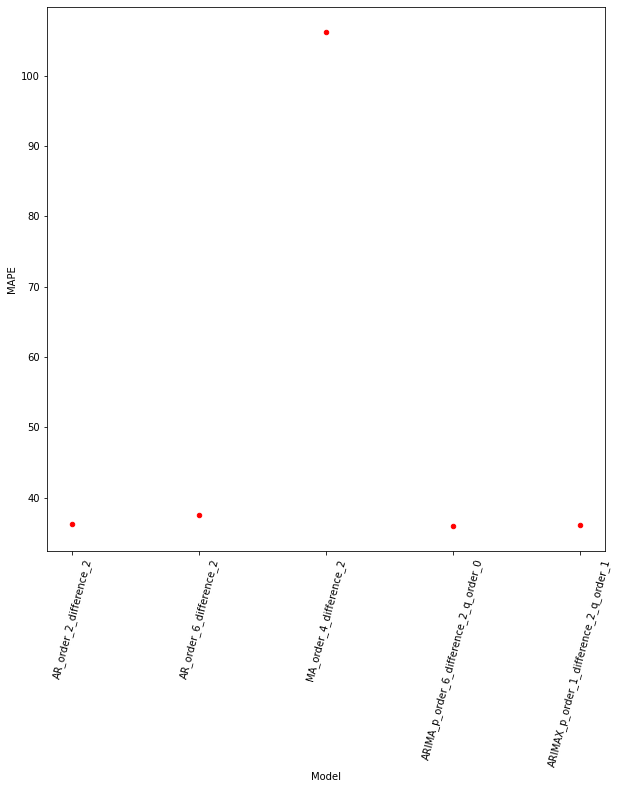

In [166]:
PerformanceB1.plot(kind = 'scatter',
        x = 'Model',
        y = 'MAPE',
        color = 'red',rot=75,figsize=(10,10))


In [147]:
PerformanceA1

,Model,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
0,Auto-ARIMA,1.510069,4.574472,0.196015,131.295359,34.393979
1,KATS-ARIMAX,19.059558,15.355154,20.648052,179.601406,58.666043
2,KATS-fbProphet,220.715370,210.736671,224.994358,653.173199,327.404899
3,KATS-Theta,5.773030,2.482021,7.184255,148.399106,40.959603
4,KATS-Quadratic,17.869888,20.425275,16.774107,92.875692,36.986241
5,KATS-LSTM,5.538479,8.477543,4.278172,121.834974,35.032292
6,KATS-Ensemble,6.048429,8.971627,4.794926,120.637399,35.113095
7,SKTIME-ThetaForecaster,0.747198,3.835338,0.577034,133.086896,34.561616
8,SKTIME-TBATS,23.689575,19.841113,25.339843,190.474613,64.836286
9,SKTIME-PolynomialTrend,11.910353,14.651163,10.735060,106.871162,36.041935


<AxesSubplot:xlabel='Model', ylabel='MAPE'>

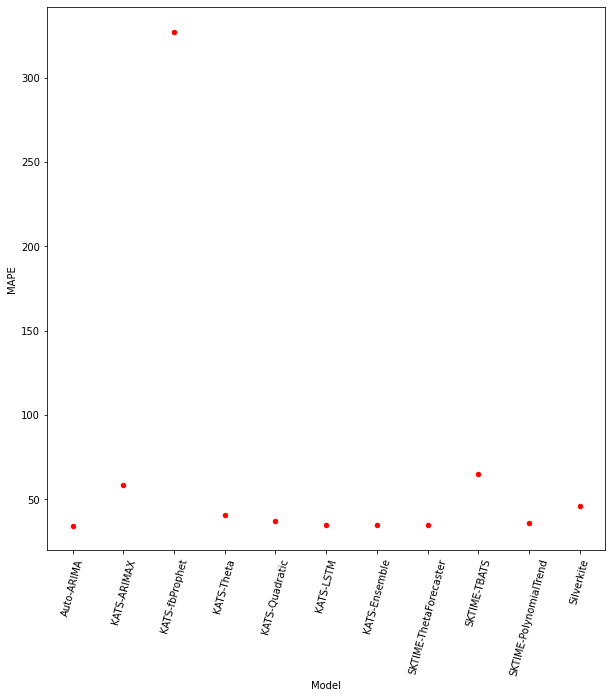

In [167]:
PerformanceA1.plot(kind = 'scatter',
        x = 'Model',
        y = 'MAPE',
        color = 'red',rot=75,figsize=(10,10))


In [148]:
PerformanceD1

,Model,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
0,DNN,1.222271,1.927146,2.572780,137.712030,35.858557
1,LSTM,13.741683,10.202739,15.259226,167.112822,51.579117
2,CNN,1.221762,1.927640,2.572263,137.710834,35.858125


<AxesSubplot:xlabel='Model', ylabel='MAPE'>

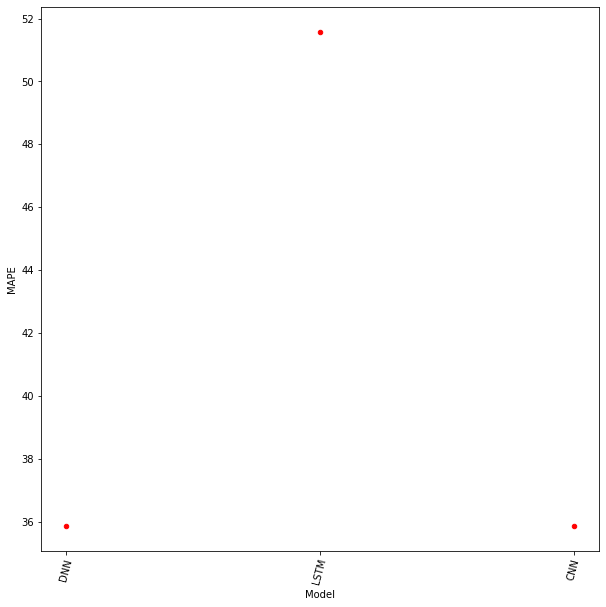

In [168]:
PerformanceD1.plot(kind = 'scatter',
        x = 'Model',
        y = 'MAPE',
        color = 'red',rot=75,figsize=(10,10))


#### Well F - 15 performance

In [149]:
PerformanceB2.rename(columns={'Unnamed: 0': 'Model'},inplace=True)
PerformanceA2.rename(columns={'Unnamed: 0': 'Model'},inplace=True)
PerformanceD2.reset_index(inplace=True)
PerformanceD2.rename(columns={'index': 'Model'},inplace=True)

In [150]:
PerformanceB2

,Model,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
0,AR_order_2_difference_2,4.461194,1.102241,36.980994,473.401118,128.986387
1,AR_order_0_difference_0,0.170149,3.380181,30.907868,447.979071,120.609317
2,MA_order_1_difference_0,4.816648,1.446266,37.447105,475.352255,129.765569
3,MA_order_3_difference_0,4.212378,0.861426,36.654719,472.035334,128.440964
4,ARIMA_p_order_0_difference_0_q_order_2,66.759857,67.828695,56.411873,82.459479,68.364976
5,ARIMAX_p_order_0_difference_0_q_order_1,67.440455,68.487408,57.304347,78.723592,67.988950


<AxesSubplot:xlabel='Model', ylabel='MAPE'>

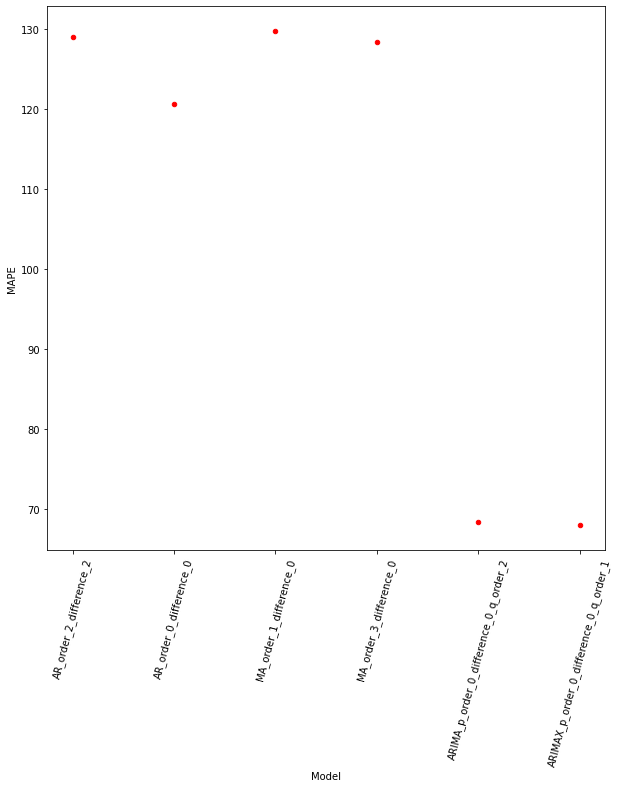

In [169]:
PerformanceB2.plot(kind = 'scatter',
        x = 'Model',
        y = 'MAPE',
        color = 'red',rot=75,figsize=(10,10))


In [151]:
PerformanceA2

,Model,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
0,Auto-ARIMA,4.816648,1.446266,37.447105,475.352254,129.765569
1,KATS-ARIMAX,13.906891,16.675217,12.894743,372.576303,104.013289
2,KATS-fbProphet,21.227239,23.760179,3.295499,332.393961,95.169219
3,KATS-Theta,10.098965,12.989735,17.888115,393.478508,108.613831
4,KATS-Quadratic,22.532051,18.592030,60.677488,572.594413,168.598996
5,KATS-LSTM,76.923127,71.234160,132.001043,871.154124,287.828113
6,KATS-Ensemble,15.663102,18.374957,10.591807,362.936234,101.891525
7,SKTIME-ThetaForecaster,15.289324,18.013198,11.081945,364.987950,102.343104
8,SKTIME-TBATS,1.690734,4.851871,28.913911,439.632385,118.772225
9,SKTIME-PolynomialTrend,23.111286,19.152640,61.437044,575.773908,169.868720


<AxesSubplot:xlabel='Model', ylabel='MAPE'>

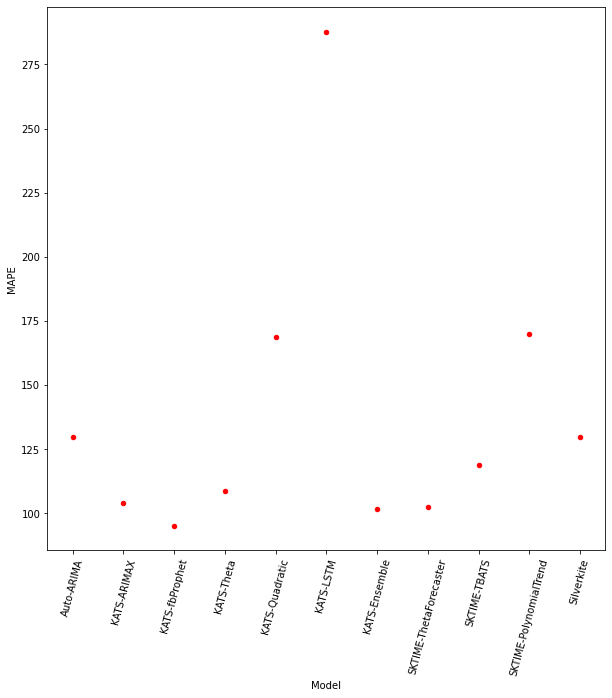

In [170]:
PerformanceA2.plot(kind = 'scatter',
        x = 'Model',
        y = 'MAPE',
        color = 'red',rot=75,figsize=(10,10))


In [152]:
PerformanceD2

,Model,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,MAPE
0,DNN,0.601429,3.797593,30.342327,445.611720,120.088267
1,LSTM,51.827219,53.376216,36.830557,164.426676,76.615167
2,CNN,20.081278,22.651067,4.798209,338.684288,96.553710


<AxesSubplot:xlabel='Model', ylabel='MAPE'>

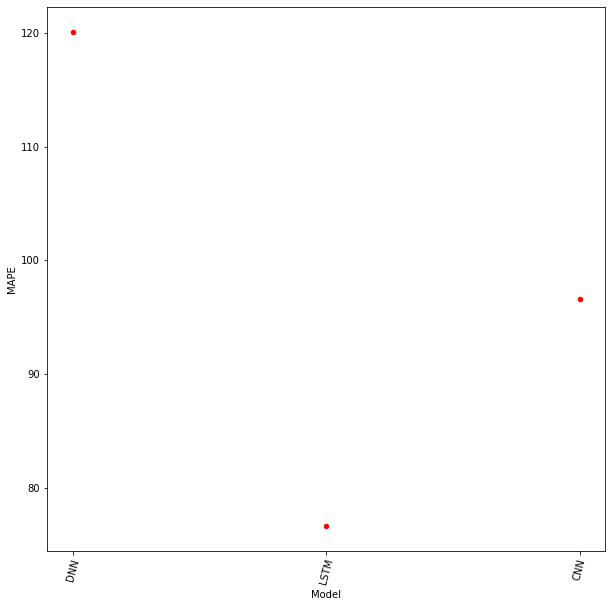

In [171]:
PerformanceD2.plot(kind = 'scatter',
        x = 'Model',
        y = 'MAPE',
        color = 'red',rot=75,figsize=(10,10))


All of the advanced packages and deep learning models that we used failed to outperform the classcial ARIMA models when it comes to modelling both wells. This goes to show that when it comes to time series forecasting both classical and advanced modelling techniques are equally important. As can be seen from our models it is the last month for both wells that is significantly throwing off our MAPE scores. This concludes our modelling.